# Ch. 1 Correlation and Autocorrelation
## Correlation
- when looking at correlation of stocks, you should check correlation between the returns, not the values


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load data and set index to date
DJI = pd.read_csv('DJI.csv', index_col='Date')
UFO = pd.read_csv('ufo_sightings.txt', index_col='Date')

# Merge data sets and rename columns
levels = DJI.join(UFO, how='inner', rsuffix='2')
levels.rename(columns={'Value':'DJI', 'Value2':'UFO'}, inplace=True)

# Compute correlation of levels
correlation1 = levels['DJI'].corr(levels['UFO'])
print("Correlation of levels: ", correlation1)

# Compute correlation of percent changes
changes = levels.pct_change()
correlation2 = changes['DJI'].corr(changes['UFO'])
print("Correlation of changes: ", correlation2)

Correlation of levels:  0.9399762210726432
Correlation of changes:  0.06026935462405376


## Simple Linear Regression in Time Series

In [3]:
import statsmodels.api as sm

# First row has null values, drop it
df = changes.dropna()

# Assign variables and add a constant to x dataframe
y = df.DJI
x = df.UFO
xc = sm.add_constant(x)

# Fit model and print the result
results = sm.OLS(y, x).fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                    DJI   R-squared (uncentered):                   0.048
Model:                            OLS   Adj. R-squared (uncentered):              0.034
Method:                 Least Squares   F-statistic:                              3.558
Date:                Fri, 16 Apr 2021   Prob (F-statistic):                      0.0633
Time:                        15:35:16   Log-Likelihood:                          24.875
No. Observations:                  72   AIC:                                     -47.75
Df Residuals:                      71   BIC:                                     -45.47
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Autocorrelation
- Corelation of a single time series with a lagged copy of itself, also called serial correlation
- Often when referring to correlation we are talking about the "Lag-One" autocorrelation, or the correlation with the value that came before it

### Interpretation of Autocorrelation
- <b>Mean Reversion</b>: Negative Autocorrelation
- <b>Momentum or Trend Following</b>: Positive Autocorrelation

In [4]:
import pandas as pd

# Load Data
MSFT = pd.read_csv('MSFT.csv')
# Convert Date to Datetime
MSFT.Date = pd.to_datetime(MSFT.Date)
# Set Date as index
MSFT.set_index('Date', inplace=True)

# Convert the daily data to weekly data
MSFT = MSFT.resample(rule='w').last()

# Compute the percentage change of prices
returns = MSFT.pct_change()
returns.dropna(inplace=True)

# Compute and print the autocorrelation of returns
autocorrelation = returns['Adj Close'].autocorr()
print("The autocorrelation of weekly returns is %4.2f" %(autocorrelation))

The autocorrelation of weekly returns is -0.16


# Ch. 2 Some Simple Time Series
## Autocorrelation Function
- Autocorrelation Function (ACF): the autocorrelation as a function of the lag
- from statsmodels.graphics.tsaplots import plot_acf
- plot_acf(x, lag=(number of lags to plot), alpha=(desired width of Conf Int))
    - alpha = 0.05 = 5% chance that the value will fall outside that window

#### Plotting ACF in Python:

The autocorrelation of weekly MSFT returns is -0.16
The approximate confidence interval is +/- 0.12


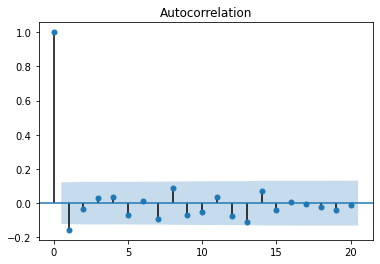

In [5]:
# Import the plot_acf module from statsmodels and sqrt from math
from statsmodels.graphics.tsaplots import plot_acf
from math import sqrt

# Compute and print the autocorrelation of MSFT weekly returns
autocorrelation = returns['Adj Close'].autocorr()
print("The autocorrelation of weekly MSFT returns is %4.2f" %(autocorrelation))

# Find the number of observations by taking the length of the returns DataFrame
nobs = len(returns)

# Compute the approximate confidence interval
conf = 1.96/sqrt(nobs)
print("The approximate confidence interval is +/- %4.2f" %(conf))

# Plot the autocorrelation function with 95% confidence intervals and 20 lags using plot_acf
plot_acf(returns, alpha=.05, lags=20)
plt.show()

Notice that the autocorrelation with lag 1 is significantly negative, but none of the other lags are significantly different from zero

## White Noise
- White noise is a series with:
    - Constant mean
    - constant variance
    - zero autocorrelation at all lag
- Special Case: if data has normal distribution, then Gaussian White Noise

### Simulating white noise
- easy to do with numpy

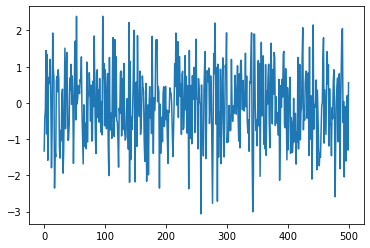

In [6]:
import numpy as np
noise = np.random.normal(loc=0, scale=1, size=500)

plt.plot(noise);

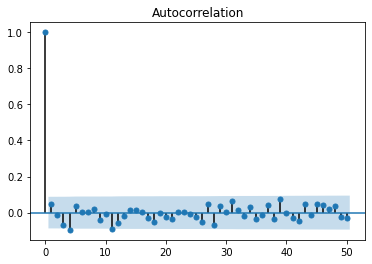

In [7]:
# Autocorrelations of white noise are zero
plot_acf(noise, lags=50)
plt.show()

Notice the white noise looks very similar to the stock return plotted above. Many times this is the case where the autocorrelation is just about zero

## What is a Random Walk
- Today's Price = Yesterday's Price + Noise
- Change in price is white noise
- Can't forecast a random walk, the best forecast for tomorrow's price is today's price

Random walk with drift
- Today's price = Yesterday's price + drift + noise
- change in price is white noise with a non-zero mean

Statistical Test for Random Walk:
- Augmented Dicky-Fuller test
- from statsmodels.tsa.stattools import adfuller
- index 1 is the p-value. Null=the series is a random walk

In [8]:
from statsmodels.tsa.stattools import adfuller
# Run Augmented Dickey-Fuller test on MSFT data
results = adfuller(MSFT)
# Print the p-value
results[1]

0.9856892582563027

p-value is greater than 0.05. Fail to reject the null and conclude that this is, in fact, a random walk

In [9]:
returns = MSFT.pct_change()
returns.dropna(inplace=True)

results = adfuller(returns)

results[1]

2.0238804729679003e-30

You can see above that the stock prices are a random walk. However, the pct returns are not...

## Stationarity
- Strong Stationarity: entire distribution of data is time-invariant (does not depend on time)
- Weak Stationarity: mean, variance, and autocorrelation are time-invariatnt

### Why do we care?
- Non-stationary sets become difficult to model
- If parameters vary with time, too many parameters to estimate
- can only estimate a parsimonious model with a few parameters
- Random walks are a common example of non-stationary data
- Seasonal series are also non-stationary

### Transforming non-stationary into stationary
#Import the plot_acf module from statsmodels

from statsmodels.graphics.tsaplots import plot_acf

#Seasonally adjust quarterly earnings

HRBsa = HRB.diff(4)

#Print the first 10 rows of the seasonally adjusted series

print(HRBsa.head(10))

#Drop the NaN data in the first four rows

HRBsa = HRBsa.dropna()

#Plot the autocorrelation function of the seasonally adjusted series

plot_acf(HRBsa)
plt.show()

# Ch. 3 Auto-Regressive (AR) Models
## Intro to AR Models
- Today = a mean + phi*yesteday + noise
- Since only 1 lag value on right side, this is an AR model of order 1, or AR(1) model
- if phi=0, process is white noise
- for stationarity, -1 < phi < +1
- Negative phi = mean reversion. A positive value in last period will mean a negative return expected this period
- Positive phi = Momentum. A positive value in last period will mean a positive return expected this period

#### Simulate AR(1) Time Series
There are a few conventions when using the arima_process module that require some explanation. First, these routines were made very generally to handle both AR and MA models. We will cover MA models next, so for now, just ignore the MA part. Second, when inputting the coefficients, you must include the zero-lag coefficient of 1, and the sign of the other coefficients is opposite what we have been using (to be consistent with the time series literature in signal processing). For example, for an AR(1) process with phi=0.9, the array representing the AR parameters would be ar = np.array([1, -0.9])

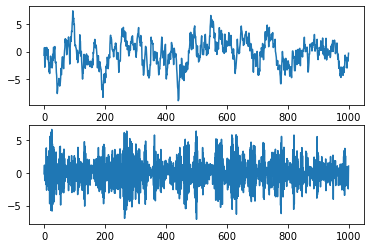

In [10]:
# import the module for simulating data
from statsmodels.tsa.arima_process import ArmaProcess

# Plot 1: AR parameter = +0.9
plt.subplot(2,1,1)
ar1 = np.array([1, -0.9])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = AR_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)

# Plot 2: AR parameter = -0.9
plt.subplot(2,1,2)
ar2 = np.array([1, 0.9])
ma2 = np.array([1])
AR_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = AR_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2)
plt.show()

The two AR parameters produce very different looking time series plots, but in the next exercise you'll really be able to distinguish the time series.

### Compare the ACF for Several AR Time Series
The autocorrelation function decays exponentially for an AR time series at a rate of the AR parameter. For example, if the AR parameter, phi=0.9 , the first-lag autocorrelation will be 0.9, the second-lag will be 
0.9^2, the third-lag will be 0.9^3, etc. A smaller AR parameter will have a steeper decay, and for a negative AR parameter, say -0.9, the decay will flip signs, so the first-lag autocorrelation will be -0.9, the second-lag will be -0.9^2=0.81, the third-lag will be -0.9^3=-0.729, etc.

## Estimating and Forecasting an AR Model

In [11]:
# Create a simulated series
ar1 = np.array([1, -0.9])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = AR_object1.generate_sample(nsample=1000)

# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Fit an AR(1) model to the first simulated data
mod = ARMA(simulated_data_1, order=(1,0))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

# Print out the estimate for the constant and for phi
print("When the true phi=0.9, the estimate of phi (and the constant) are:")
print(res.params)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(1, 0)   Log Likelihood               -1411.650
Method:                       css-mle   S.D. of innovations              0.992
Date:                Fri, 16 Apr 2021   AIC                           2829.301
Time:                        15:35:17   BIC                           2844.024
Sample:                             0   HQIC                          2834.896
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0032      0.315     -0.010      0.992      -0.621       0.615
ar.L1.y        0.9014      0.014     66.307      0.000       0.875       0.928
                                    Roots           

### Forecasting with an AR Model

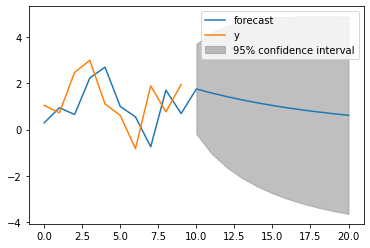

In [12]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Forecast the first AR(1) model
mod = ARMA(simulated_data_1, order=(1,0))
res = mod.fit()
res.plot_predict(start=990, end=1010)
plt.show()

### Compare AR Model with Random Walk
Sometimes it is difficult to distinguish between a time series that is slightly mean reverting and a time series that does not mean revert at all, like a random walk. You will compare the ACF for the slightly mean-reverting interest rate series of the last exercise with a simulated random walk with the same number of observations.

You should notice when plotting the autocorrelation of these two series side-by-side that they look very similar.

## Identifying the order of an AR model
- the order of an AR() model will usually be unknown
- Two Techiques
    - Partial Autocorrelation Function (PACF): 
        - measures the incremental benefit of adding another lag
        - from statsmodels.graphics.tsaplots import plot_pcaf. arguements are the same as plot_acf
    - Information Criteria:
        - adjusts the goodness-of-fit for number of parameters by imposing a penalty for additional parameters
        - two popular adjusted goodness-of-fit measures
            - AIC (Akaike Information Criterion)
            - BIC (Bayesian Information Criterion)
        - Plot multiple parameters models and try to choose the one with the lowest ACI and/or BIC          

### Estimate Order of Model: PACF
One useful tool to identify the order of an AR model is to look at the Partial Autocorrelation Function (PACF). In this exercise, you will simulate two time series, an AR(1) and an AR(2), and calculate the sample PACF for each. You will notice that for an AR(1), the PACF should have a significant lag-1 value, and roughly zeros after that. And for an AR(2), the sample PACF should have significant lag-1 and lag-2 values, and zeros after that.

Just like you used the plot_acf function in earlier exercises, here you will use a function called plot_pacf in the statsmodels module.

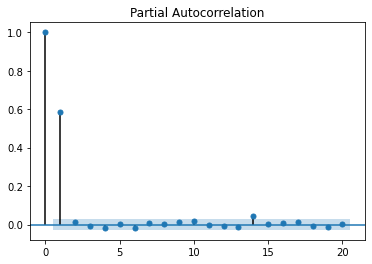

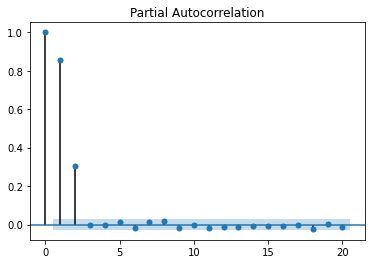

In [13]:
# Import the modules for simulating data and for plotting the PACF
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_pacf

# Simulate AR(1) with phi=+0.6
ma = np.array([1])
ar = np.array([1, -0.6])
AR_object = ArmaProcess(ar, ma)
simulated_data_1 = AR_object.generate_sample(nsample=5000)

# Plot PACF for AR(1)
plot_pacf(simulated_data_1, lags=20)
plt.show()

# Simulate AR(2) with phi1=+0.6, phi2=+0.3
ma = np.array([1])
ar = np.array([1, -.6, -.3])
AR_object = ArmaProcess(ar, ma)
simulated_data_2 = AR_object.generate_sample(nsample=5000)

# Plot PACF for AR(2)
plot_pacf(simulated_data_2, lags=20)
plt.show()

### Estimate Order of Model: Information Criteria
Another tool to identify the order of a model is to look at the Akaike Information Criterion (AIC) and the Bayesian Information Criterion (BIC). These measures compute the goodness of fit with the estimated parameters, but apply a penalty function on the number of parameters in the model. You will take the AR(2) simulated data from the last exercise, saved as simulated_data_2, and compute the BIC as you vary the order, p, in an AR(p) from 0 to 6.

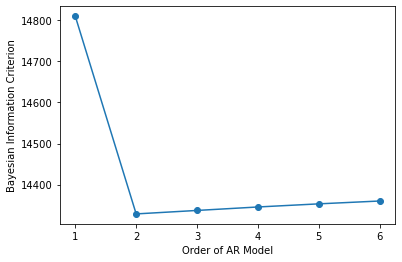

In [14]:
# Import the module for estimating an ARMA model
from statsmodels.tsa.arima_model import ARMA

# Fit the data to an AR(p) for p = 0,...,6 , and save the BIC
BIC = np.zeros(7)
for p in range(7):
    mod = ARMA(simulated_data_2, order=(p,0))
    res = mod.fit()
# Save BIC for AR(p)    
    BIC[p] = res.bic
    
# Plot the BIC as a function of p
plt.plot(range(1,7), BIC[1:7], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Bayesian Information Criterion')
plt.show()

# Ch. 4 Moving Average (MA) and ARMA Models
- Today = a mean + noise + a fraction (theta) of Yesterday's Noise
- when using only one lag it is an MA(1) model (Moving average order 1)
- if theta = 0, the process is white noise
- MA models are stationary for all values of theta
- Negative Theta: one-period Mean Reversion
- Positive Theta: one-period Momentum
- Note: one-period autocorrelation is Theta/(1+Theta^2)

### Simulate MA(1) Time Series

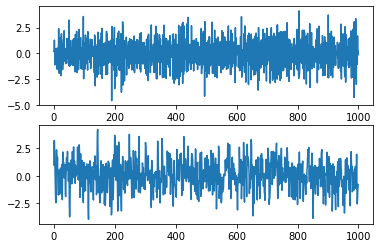

In [15]:
# import the module for simulating data
from statsmodels.tsa.arima_process import ArmaProcess

# Plot 1: MA parameter = -0.9
plt.subplot(2,1,1)
ar1 = np.array([1])
ma1 = np.array([1, -.9])
MA_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = MA_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)

# Plot 2: MA parameter = +0.9
plt.subplot(2,1,2)
ar2 = np.array([1])
ma2 = np.array([1, .9])
MA_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = MA_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2)

plt.show()

### Compute the ACF for Several MA Time Series
Unlike an AR(1), an MA(1) model has no autocorrelation beyond lag 1, an MA(2) model has no autocorrelation beyond lag 2, etc. The lag-1 autocorrelation for an MA(1) model is not theta, but rather theta/(1+Theta^2). For example, if the MA paramete theta is = +0.9, the first-lag autocorrelation will be 0.9/(1+(.9^2))=0.497, and the autocorrelation at all other lags will be zero. If the MA parameter theta is -0.9, the first-lag autocorrelation will be -0.9/(1+(-.9^2))= -0.497

## Estimating and Forecasting on MA Model
- Same as estimating an AR model (except order=(0,1)
- Unlike an AR forecast, all predictions will be the same past the order of the MA model(ex. MA(1) will give one forecast point and all the rest will be the same)

### Estimating parameters with MA

In [16]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Fit an MA(1) model to the first simulated data
mod = ARMA(simulated_data_1, order=(0,1))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

# Print out the estimate for the constant and for theta
print("When the true theta=-0.9, the estimate of theta (and the constant) are:")
print(res.params)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(0, 1)   Log Likelihood               -1415.632
Method:                       css-mle   S.D. of innovations              0.996
Date:                Fri, 16 Apr 2021   AIC                           2837.263
Time:                        15:35:20   BIC                           2851.986
Sample:                             0   HQIC                          2842.859
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0021      0.003     -0.768      0.442      -0.007       0.003
ma.L1.y       -0.9149      0.013    -71.027      0.000      -0.940      -0.890
                                    Roots           

#### Forecasting with an MA model

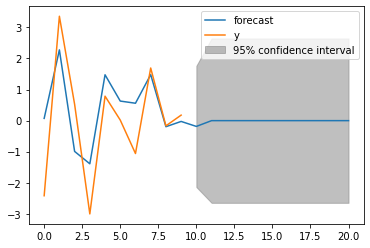

In [17]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Forecast the first MA(1) model
mod = ARMA(simulated_data_1, order=(0,1))
res = mod.fit()
res.plot_predict(start=990, end=1010)
plt.show()

## ARMA Models
- Combination of AR and MA model

In [18]:
# Load Data
S = pd.read_csv('Sprint_Intraday.txt', header=None)
intraday = S.iloc[:,0:2]

# import datetime module
import datetime

# Change the first date to zero
intraday.iloc[0,0] = 0

# Change the column headers to 'DATE' and 'CLOSE'
intraday.columns = ['DATE', 'CLOSE']

# Examine the data types for each column
print(intraday.dtypes)

# Convert DATE column to numeric
intraday['DATE'] = pd.to_numeric(intraday['DATE'])

# Make the `DATE` column the new index
intraday = intraday.set_index('DATE')

DATE      object
CLOSE    float64
dtype: object


##### Check for missing row values

In [19]:
# Everything
set_everything = set(range(391))

# The intraday index as a set
set_intraday = set(intraday.index)

# Calculate the difference
set_missing = set_everything - set_intraday

# Print the difference
print("Missing rows: ", set_missing)

Missing rows:  {182, 14}


Fill in the missing rows using the .reindex() method, setting the index equal to the full range(391) and forward filling the missing data by setting the method argument to 'ffill'.

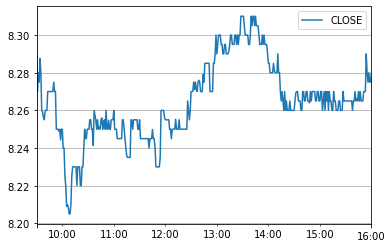

In [20]:
# Fill in the missing rows
intraday = intraday.reindex(range(391), method='ffill')

# Change the index to the intraday times
intraday.index = pd.date_range(start='2017-09-01 9:30', end='2017-09-01 16:00', freq='1min')

# Plot the intraday time series
intraday.plot(grid=True)
plt.show()

### #Applying an MA Model
The bouncing of the stock price between bid and ask induces a negative first order autocorrelation, but no autocorrelations at lags higher than 1. You get the same ACF pattern with an MA(1) model. Therefore, you will fit an MA(1) model to the intraday stock data from the last exercise.

The first step is to compute minute-by-minute returns from the prices in intraday, and plot the autocorrelation function. You should observe that the ACF looks like that for an MA(1) process. Then, fit the data to an MA(1), the same way you did for simulated data.

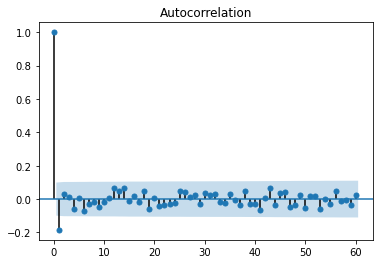

const         -0.000002
ma.L1.CLOSE   -0.179272
dtype: float64


In [21]:
# Import plot_acf and ARMA modules from statsmodels
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_model import ARMA

# Compute returns from prices and drop the NaN
returns = intraday.pct_change()
returns = returns.dropna()

# Plot ACF of returns with lags up to 60 minutes
plot_acf(returns, lags=60)
plt.show()

# Fit the data to an MA(1) model
mod = ARMA(returns, order=(0,1))
res = mod.fit()
print(res.params)

# Ch. 5 Putting It All Together
## Cointergration Models
- Even if the prices of two assests both follow a random walk, it is possible that a linear combination of them may not be a random walk 
- If neither are forecastable on their own, but the linear combination is, then they are said to be cointegrated
- P = owner, Q = dog, both seem to be on a random walk. But the distance between them, the leash, can be mean reverting. If the dog is behind the owner he may run to catch up. If the dog is ahead, the leash may cause it to get pulled back
- Heating Oil and Natural gas both look like random walks. But they follow this pattern

What types of series are cointegrated? Economic Substitutes
- Heating Oil and Natural Gas
- Platinum and Palladium
- corn and wheat
- corn and sugar
- bitcoun and ethereum

### testing for cointegration
- Regress P on Q and get slope c
- run augmented dickey-fuller test on P-cQ to test for random walk
- Alternatively, can use coint function in statsmodels that combines both steps
    - from statsmodels.tsa.stattools import coint
    - coint(P, Q)

The Heating Oil and Natural Gas prices are pre-loaded in DataFrames HO and NG. First, plot both price series, which look like random walks. Then plot the difference between the two series, which should look more like a mean reverting series (to put the two series in the same units, we multiply the heating oil prices, in dollars/gallon, by 7.25, which converts it to dollars/millionBTU, which is the same units as Natural Gas).

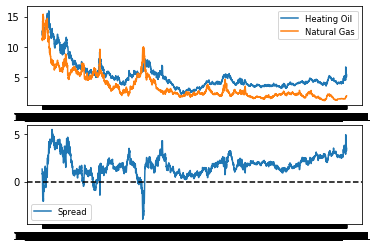

In [22]:
HO = pd.read_csv('CME_HO1.csv').set_index('Date')
NG = pd.read_csv('CME_NG1.csv').set_index('Date')

# Plot the prices separately
plt.subplot(2,1,1)
plt.plot(7.25*HO['Close'], label='Heating Oil')
plt.plot(NG['Close'], label='Natural Gas')
plt.legend(loc='best', fontsize='small')

# Plot the spread
plt.subplot(2,1,2)
plt.plot(7.25*HO['Close']-NG['Close'], label='Spread')
plt.legend(loc='best', fontsize='small')
plt.axhline(y=0, linestyle='--', color='k')
plt.show()

To verify that Heating Oil and Natural Gas prices are cointegrated, First apply the Dickey-Fuller test separately to show they are random walks. Then apply the test to the difference, which should strongly reject the random walk hypothesis. The Heating Oil and Natural Gas prices are pre-loaded in DataFrames HO and NG.

In [23]:
# Import the adfuller module from statsmodels
from statsmodels.tsa.stattools import adfuller

# Compute the ADF for HO and NG
result_HO = adfuller(HO['Close'])
print("The p-value for the ADF test on HO is ", result_HO[1])
result_NG = adfuller(NG['Close'])
print("The p-value for the ADF test on NG is ", result_NG[1])

# Compute the ADF of the spread
result_spread = adfuller(7.25 * HO['Close'] - NG['Close'])
print("The p-value for the ADF test on the spread is ", result_spread[1])

The p-value for the ADF test on HO is  0.019831028071626525
The p-value for the ADF test on NG is  0.0045472849565425045
The p-value for the ADF test on the spread is  0.00011887051827352973


#### Testing Cointegration of HO and NG

In [24]:
# Import the statsmodels module for regression and the adfuller function
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# Regress HO on NG
NG = sm.add_constant(NG)
result = sm.OLS(HO,NG).fit()

# Compute ADF
b = result.params[1]
adf_stats = adfuller(HO['Close'] - b*NG['Close'])
print("The p-value for the ADF test is ", adf_stats[1])

The p-value for the ADF test is  0.0005467677716962492


## Case Study: New York Temperatures

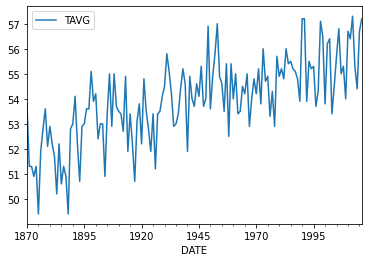

The p-value for the ADF test is  0.5832938987871106


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

temp_NY = pd.read_csv('ny_temp.txt').set_index('DATE')

# Import the adfuller function from the statsmodels module
from statsmodels.tsa.stattools import adfuller

# Convert the index to a datetime object
temp_NY.index = pd.to_datetime(temp_NY.index, format='%Y')

# Plot average temperatures
temp_NY.plot()
plt.show()

# Compute and print ADF p-value
result = adfuller(temp_NY['TAVG'])
print("The p-value for the ADF test is ", result[1])

We fail to reject the null and conclude that the data seems to follow a random walk and has some drift

Since the temperature series, temp_NY, is a random walk with drift, take first differences to make it stationary. Then compute the sample ACF and PACF. This will provide some guidance on the order of the model.

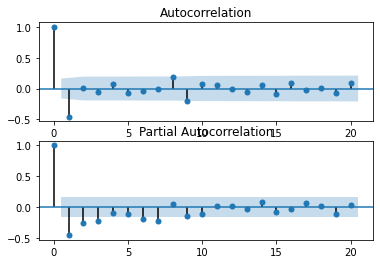

In [30]:
# Import the modules for plotting the sample ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Take first difference of the temperature Series
chg_temp = temp_NY.diff()
chg_temp = chg_temp.dropna()

# Plot the ACF and PACF on the same page
fig, axes = plt.subplots(2,1)

# Plot the ACF
plot_acf(chg_temp, lags=20, ax=axes[0])

# Plot the PACF
plot_pacf(chg_temp, lags=20, ax=axes[1])
plt.show()

There is no clear pattern in the ACF and PACF except the negative lag-1 autocorrelation in the ACF.

#### Which ARMA Model is Best?
Recall from Chapter 3 that the Akaike Information Criterion (AIC) can be used to compare models with different numbers of parameters. It measures goodness-of-fit, but places a penalty on models with more parameters to discourage overfitting. Lower AIC scores are better.

Fit the temperature data to an AR(1), AR(2), and ARMA(1,1) and see which model is the best fit, using the AIC criterion. The AR(2) and ARMA(1,1) models have one more parameter than the AR(1) has.

In [32]:
# Import the module for estimating an ARMA model
from statsmodels.tsa.arima_model import ARMA

# Fit the data to an AR(1) model and print AIC:
mod_ar1 = ARMA(chg_temp, order=(1, 0))
res_ar1 = mod_ar1.fit()
print("The AIC for an AR(1) is: ", res_ar1.aic)

# Fit the data to an AR(2) model and print AIC:
mod_ar2 = ARMA(chg_temp, order=(2, 0))
res_ar2 = mod_ar2.fit()
print("The AIC for an AR(2) is: ", res_ar2.aic)

# Fit the data to an ARMA(1,1) model and print AIC:
mod_arma11 = ARMA(chg_temp, order=(1, 1))
res_arma11 = mod_arma11.fit()
print("The AIC for an ARMA(1,1) is: ", res_arma11.aic)

C:\Users\16084\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\16084\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\16084\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


The AIC for an AR(1) is:  510.534689831392
The AIC for an AR(2) is:  501.9274123160227
The AIC for an ARMA(1,1) is:  469.0729149179323


#### Don't Throw Out That Winter Coat Yet
Finally, you will forecast the temperature over the next 30 years using an ARMA(1,1) model, including confidence bands around that estimate. Keep in mind that the estimate of the drift will have a much bigger impact on long range forecasts than the ARMA parameters.

Earlier, you determined that the temperature data follows a random walk and you looked at first differencing the data. In this exercise, you will use the ARIMA module on the temperature data (before differencing), which is identical to using the ARMA module on changes in temperature, followed by taking cumulative sums of these changes to get the temperature forecast.

C:\Users\16084\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\16084\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


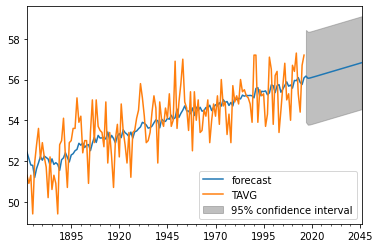

In [33]:
# Import the ARIMA module from statsmodels
from statsmodels.tsa.arima_model import ARIMA

# Forecast temperatures using an ARIMA(1,1,1) model
mod = ARIMA(temp_NY, order=(1,1,1))
res = mod.fit()

# Plot the original series and the forecasted series
res.plot_predict(start='1872-01-01', end='2046-01-01')
plt.show()